<a href="https://colab.research.google.com/github/EmYassir/ml_dl_algorithms/blob/main/KP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5

This lab consists of 2 parts:
 1. Understanding linear and kernel perceptrons
 2. Implementation of linear and kernel perceptron

## Perceptron and Stochastic Gradient Descent

We have studied that given a model and a cost function, we learn the parameters of the model by using stochastic gradient descent. This consists in iteratively modifying the parameters by looping on the examples $\left(x, y\right)$ and by adding a gradient term. 



### Perceptron Algorithm

The perceptron algorithm is a stochastic learning algorithm that iteratively improves a model by running it on training samples, then updating the model whenever it finds it has made an incorrect classification. The model learned by the standard perceptron algorithm is a linear classifier: a vector of weights $\mathbf{w}$ that is used to classify a sample vector $\mathbf{x}$ as class "*one*" or class "*minus one*" according to

$${{\hat {y}}=\operatorname {sgn} (\mathbf {w} ^{\top }\mathbf {x} )}$$
where a zero is mapped to minus one. (The "hat" on $\hat{y}$ denotes an estimated value.)

In pseudocode, the perceptron algorithm is given by:

* Initialize $\mathbf{w}$ to an all-zero vector of length $p$, the number of predictors (features).
* For some fixed number of iterations, or until some stopping criterion is met:
    - For each training example $\mathbf{x}_i$ with ground truth label $y_i ∈ \{-1, 1\}$:

    Let, $\hat{y} = sgn(\mathbf{w}^T \mathbf{x}_i)$
    
    If $ \hat{y} \neq y_i$, $\mathbf{w} := \mathbf{w} + y_i \mathbf{x}_i$

## Part 2: Non-Linear Transformations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time

In [2]:
! rm cercle.txt ellipse.txt
! wget https://www.dropbox.com/s/chfkj30rlnez38o/cercle.txt
! wget https://www.dropbox.com/s/u0jxsd8a0iuiqgx/ellipse.txt

rm: cannot remove 'cercle.txt': No such file or directory
rm: cannot remove 'ellipse.txt': No such file or directory
--2023-05-21 18:15:14--  https://www.dropbox.com/s/chfkj30rlnez38o/cercle.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/chfkj30rlnez38o/cercle.txt [following]
--2023-05-21 18:15:15--  https://www.dropbox.com/s/raw/chfkj30rlnez38o/cercle.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc006d7a987e91e3e85a40bc2506.dl.dropboxusercontent.com/cd/0/inline/B8d4ikxI6Mbqxmx9jHXgU2PDtgTTnVUVI3qVvHykecI4tFPAu3nTJNIxhhEeHgByVZKxSuvq3Hw_Ytt0F9r5dO35K665WUdD0Xq7wI9Xrs-NkG9n9lbevNOKxNsS-QQ6plnj140oc4H9wcBFkfr7Fm6pHhauKDfOqIuS1NekZSxe2w/file# [following]
--2023-05-21 18:15:15--  https://uc006d7a987e91e3e85a40bc2506.dl.dro

In [3]:
# We start by loading the dataset

data = np.loadtxt('cercle.txt')
# data = np.loadtxt('ellipse.txt')

# There are only 2 dimensions...
train_cols = [0, 1]
# A variable to hold the index of the label column.
target_ind = [data.shape[1] - 1]

# Number of classes
n_classes = 2
# Number of training points
n_train = 1500

# Uncomment to get non-deterministic results 
random.seed(3395)

# Randomly select indices for the training and test set
inds = np.arange(data.shape[0])
random.shuffle(inds)
train_inds = inds[:n_train]
test_inds = inds[n_train:]
    
# Separate the dataset into two sets: training and test.
train_set = data[train_inds,:]	# keep the good rows
train_set = train_set[:, train_cols + target_ind]  # keep the right columns
test_set = data[test_inds,:]
test_set = test_set[:, train_cols + target_ind]

# Separate the test set: inputs and labels.
test_inputs = test_set[:,:-1]
test_labels = test_set[:,-1]

# Plot the decision boundary
def plot(model, outputs):
    train_classes_pred = np.sign(outputs)
    plt.scatter(train_set[:, 0], train_set[:, 1], c=train_classes_pred)
    plt.scatter(test_set[:, 0], test_set[:, 1], c=classes_pred)
    plt.title('Prediction')
    plt.show()

    plt.scatter(train_set[:, 0], train_set[:, 1], c=train_set[:,-1])
    plt.scatter(test_set[:, 0], test_set[:, 1], c=test_labels)
    plt.title('True labels')
    plt.show()

To demonstrate the use of non-linear transformations, we will make use of the circle and ellipse datasets, available on the website. We will first apply a transformation on the dataset before training. The algorithm will then uniquely work with the transformed data. To keep things simple at first, we will simply implement a transformation consisting of a degree two polynomial. And to make it even more simple, the circle and ellipse datasets are only in 2-d...

$$\phi : \mathbb{R}^2 \rightarrow \mathbb{R}^6$$

$$\phi(x_1, x_2) = \left(1,x_1,x_2,x_1^2,x_2^2,x_1x_2\right)$$

**Exercise: implement this transformation in the polynomial function below:**

In [4]:
# Takes a matrix of data examples x (n datapoints, input space dimension) as input (without labels) and returns the transformed
# matrix (n datapoints, projected space dimension)
def polynomial(X):
    Y = np.zeros((X.shape[0], 6))
    Y[:, 0] = 1.
    # Please fill in the code below
    Y[:, 1] = X[:, 0]
    Y[:, 2] = X[:, 1]
    Y[:, 3] = X[:, 0] ** 2
    Y[:, 4] = X[:, 1] ** 2
    Y[:, 5] = X[:, 0] * X[:, 1]
    return Y

**Exercise: Now that the transformation is implemented, you should complete the code of the Perceptron algorithm**

In [5]:
class Perceptron:
    def __init__(self):
        return

    def train(self, train_data):
        n_example = train_data.shape[0]            
        self.weights = np.random.random(train_data.shape[1] - 1)

        i = 0
        count = 0 # We stop when the set is linearly separated
        n_iter = 0
        n_iter_max = n_example * 100
        while (count < n_example and n_iter < n_iter_max):
            # Please, dear master, fill in the code below
            if (np.dot(train_data[i, :-1], self.weights)) * train_data[i, -1] < 0:
                self.weights += train_data[i, -1] * train_data[i, :-1]
                count = 0
            else:
                count = count + 1
            i = (i + 1) % n_example
            n_iter += 1

    def compute_predictions(self, test_data):
        outputs = []
        for data in test_data:
            outputs.append(np.dot(data, self.weights))
        return outputs

We will train a perceptron on  1500  training examples
The test error is  0.0 %


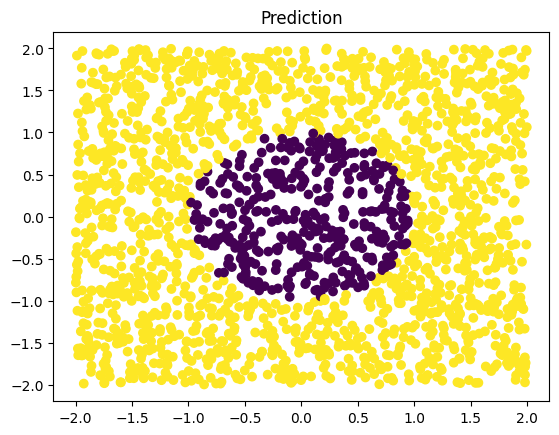

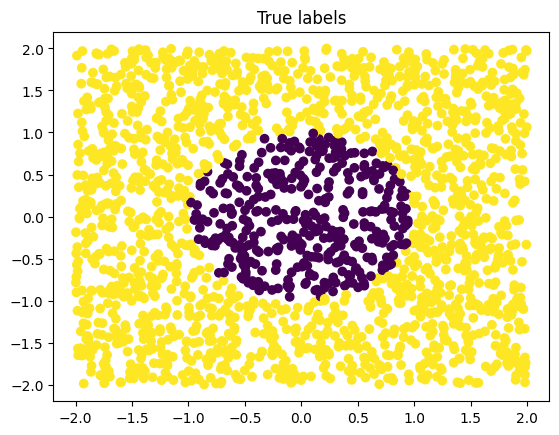

In [6]:
print("We will train a perceptron on ", n_train, " training examples")

# Transform the dataset
transformed_train_set = np.concatenate((polynomial(train_set[:,:-1]), train_set[:, -1][:, None]), axis=1)
transformed_test_inputs = polynomial(test_inputs)

# Create and train the model
model = Perceptron()
model.train(transformed_train_set)

# Obtain the ouputs on the test set.
outputs = model.compute_predictions(transformed_test_inputs)

# Convert the outputs into classes by taking the sign.
classes_pred = np.sign(outputs)

# Measure the performance
err = 1.0 - np.mean(test_labels==classes_pred)
print("The test error is ", 100.0 * err,"%")

# Decision boundary
outputs = model.compute_predictions(transformed_train_set[:,:-1])
plot(model, outputs)

## 2. Kernel trick

Your objective for this section is to implement a gaussian kernel perceptron. We will ask you to use a gaussian kernel for this problem. For a review, please refer to the [course document](https://studium.umontreal.ca/pluginfile.php/4043631/mod_resource/content/2/13_kernel_trick-en-3395.pdf), especially the second part.

**Exercise: implement a polynomial kernel function of arbitrary degree**

In [7]:
def kernel_polynomial(x, y, deg=2):
    # https://en.wikipedia.org/wiki/Polynomial_kernel
    return (1 + np.dot(y, x))**deg

def kernel_rbf(x, y):
    return ...

In [8]:
kernel_polynomial(np.array([0,1]), np.array([[0,1],[1,0]]))

array([4, 1])

### Kernel methods

A *kernel machine* is a classifier that stores a subset of its training examples $\mathbf{x}_i$, associates with each a weight $α_i$, and makes decisions for new samples $\mathbf{x}'$ by evaluating

$${\operatorname{sgn} \sum _{i=1}^N\alpha _{i}y_{i}K(\mathbf {x} _{i},\mathbf {x'} )}$$

Here, $K$ is some kernel function. Formally, a kernel function is a non-negative semidefinite kernel, representing an inner product between samples in a high-dimensional space, as if the samples had been expanded to include additional features by a function $\phi: K(\mathbf{x}, \mathbf{x'}) = \phi(\mathbf{x})^T \phi(\mathbf{x}')$. Intuitively, it can be thought of as a similarity function between samples.

### Kernel Perceptron

To derive the kernel perceptron algorithm, we must first formulate it in dual form, starting from the observation that the weight vector $\mathbf{w}$ can be expressed as a linear combination of the $n$ training samples. The equation for the weight vector is
$$\mathbf{w} =\sum _{i}^{n}\alpha _{i}y_{i}\mathbf {x} _{i}$$
where $\alpha_i$ is the number of times $\mathbf{x}_i$ was misclassified, forcing an update $\mathbf{w} := \mathbf{w} + y_i x_i$. Using this result, we can formulate the dual perceptron algorithm, which loops through the samples as before, making predictions, but instead of storing and updating a weight vector $\mathbf{w}$, it updates a *mistake counter* vector $\mathbf{\alpha}$. We must also rewrite the prediction formula to get rid of $\mathbf{w}$:

$${\begin{aligned}{\hat{y}}&=\operatorname {sgn}(\mathbf {w} ^{\mathsf {T}}\mathbf {x} )\\&=\operatorname {sgn} \left(\sum _{i}^{n}\alpha _{i}y_{i}\mathbf {x} _{i}\right)^{\mathsf {T}}\mathbf {x} \\&=\operatorname {sgn} \sum _{i}^{n}\alpha _{i}y_{i}(\mathbf {x} _{i}\cdot \mathbf {x} )\end{aligned}}$$


Plugging these two equations into the training loop turn it into the dual perceptron algorithm.

Finally, we can replace the dot product in the dual perceptron by an arbitrary kernel function, to get the effect of a feature map $\phi$ without computing $\phi(x)$ explicitly for any samples. Doing this yields the kernel perceptron algorithm:

* Initialize $\alpha$ to an all-zeros vector of length $n$, the number of training samples.
* For some fixed number of iterations, or until some stopping criterion is met:
    For each training example $x_j$, $y_j$:
    Let $${\hat{y}}=\operatorname {sgn} \sum _{i}^{n}\alpha _{i}y_{i}K(\mathbf {x} _{i},\mathbf {x} _{j})$$
    If $\hat{y} \neq y_j$, perform an update by incrementing the mistake counter:
    $$\alpha_j := \alpha_j + 1$$

Now, we will implement the kernel perceptron.

**Exercise: Complete the code below for the kernel perceptron algorithmn**

Hint: Reuse the perceptron code above, but rather than learning the vector $w$ directly, you need to rewrite $\mathbf{w} = \sum_i \alpha_i \mathbf{x}_i$ and to learn the coefficients $a_i$. Then, we replace $\mathbf{w}^T x$ by $\left(\sum_i \alpha_i \mathbf{x}_i\right)^T x$ and apply the kernel trick.

In [9]:
class KernelPerceptron:
    def __init__(self, kernel_fn):
        self.kernel_fn = kernel_fn

    def train(self, train_data):
        n_example = train_data.shape[0]
        self.train_data = np.array(train_data)

        # alpha initialisation
        self.a = np.zeros(n_example)

        # Get rid of the labels
        train_x = self.train_data[:,:-1]
        train_y = self.train_data[:,-1]

        self.train_x = train_x
        self.train_y = train_y

        # Gram matrix
        K = np.zeros((n_example, n_example))
        for i in range(n_example):
            K[i] = self.kernel_fn(train_x[i], train_x)

        # Kernel calculation
        i = 0
        count = 0
        n_iter = 0
        n_iter_max = n_example * 100
        while (count < n_example and n_iter < n_iter_max):
            # Please write the following code
            if np.sign(np.sum(self.a * train_y * K[i])) != train_y[i]:
                self.a[i] += 1
                count = 0
            else:
                count = count + 1
            i = (i + 1) % n_example
            n_iter += 1

    def compute_predictions(self, test_data):
        outputs = []
        for i in range(len(test_data)):
            # Please write the following code
            prediction = np.sum(self.kernel_fn(test_data[i], self.train_x)*self.a*self.train_y)
            outputs.append(prediction)
        return outputs

We will learn a kernel perceptron on  1500  training examples
The test error is 0.40000000000000036%


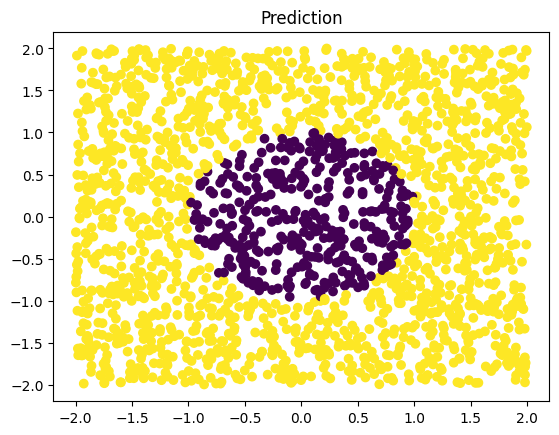

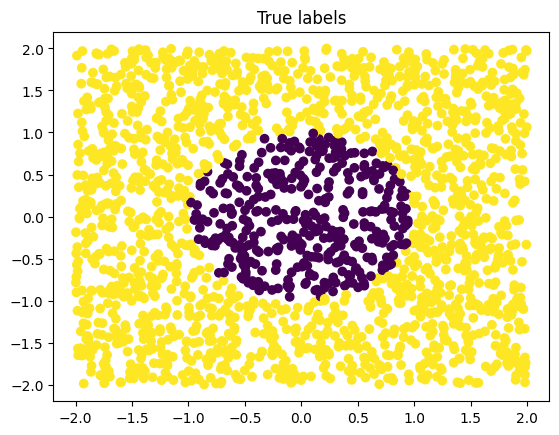

In [10]:
print("We will learn a kernel perceptron on ", n_train, " training examples")

model = KernelPerceptron(kernel_polynomial)
model.train(train_set)

outputs = model.compute_predictions(test_inputs)
classes_pred = np.sign(outputs)
err = 1.0 - np.mean(test_labels==classes_pred)
print("The test error is {}%".format(100.0 * err))
outputs = model.compute_predictions(train_set[:,:-1])

plot(model, outputs)